In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
knn_df = pd.read_csv('C:\\Chandu\\Python\\Refactored_Py_DS_ML_Bootcamp-master\\14-K-Nearest-Neighbors\KNN_Project_Data')
knn_df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

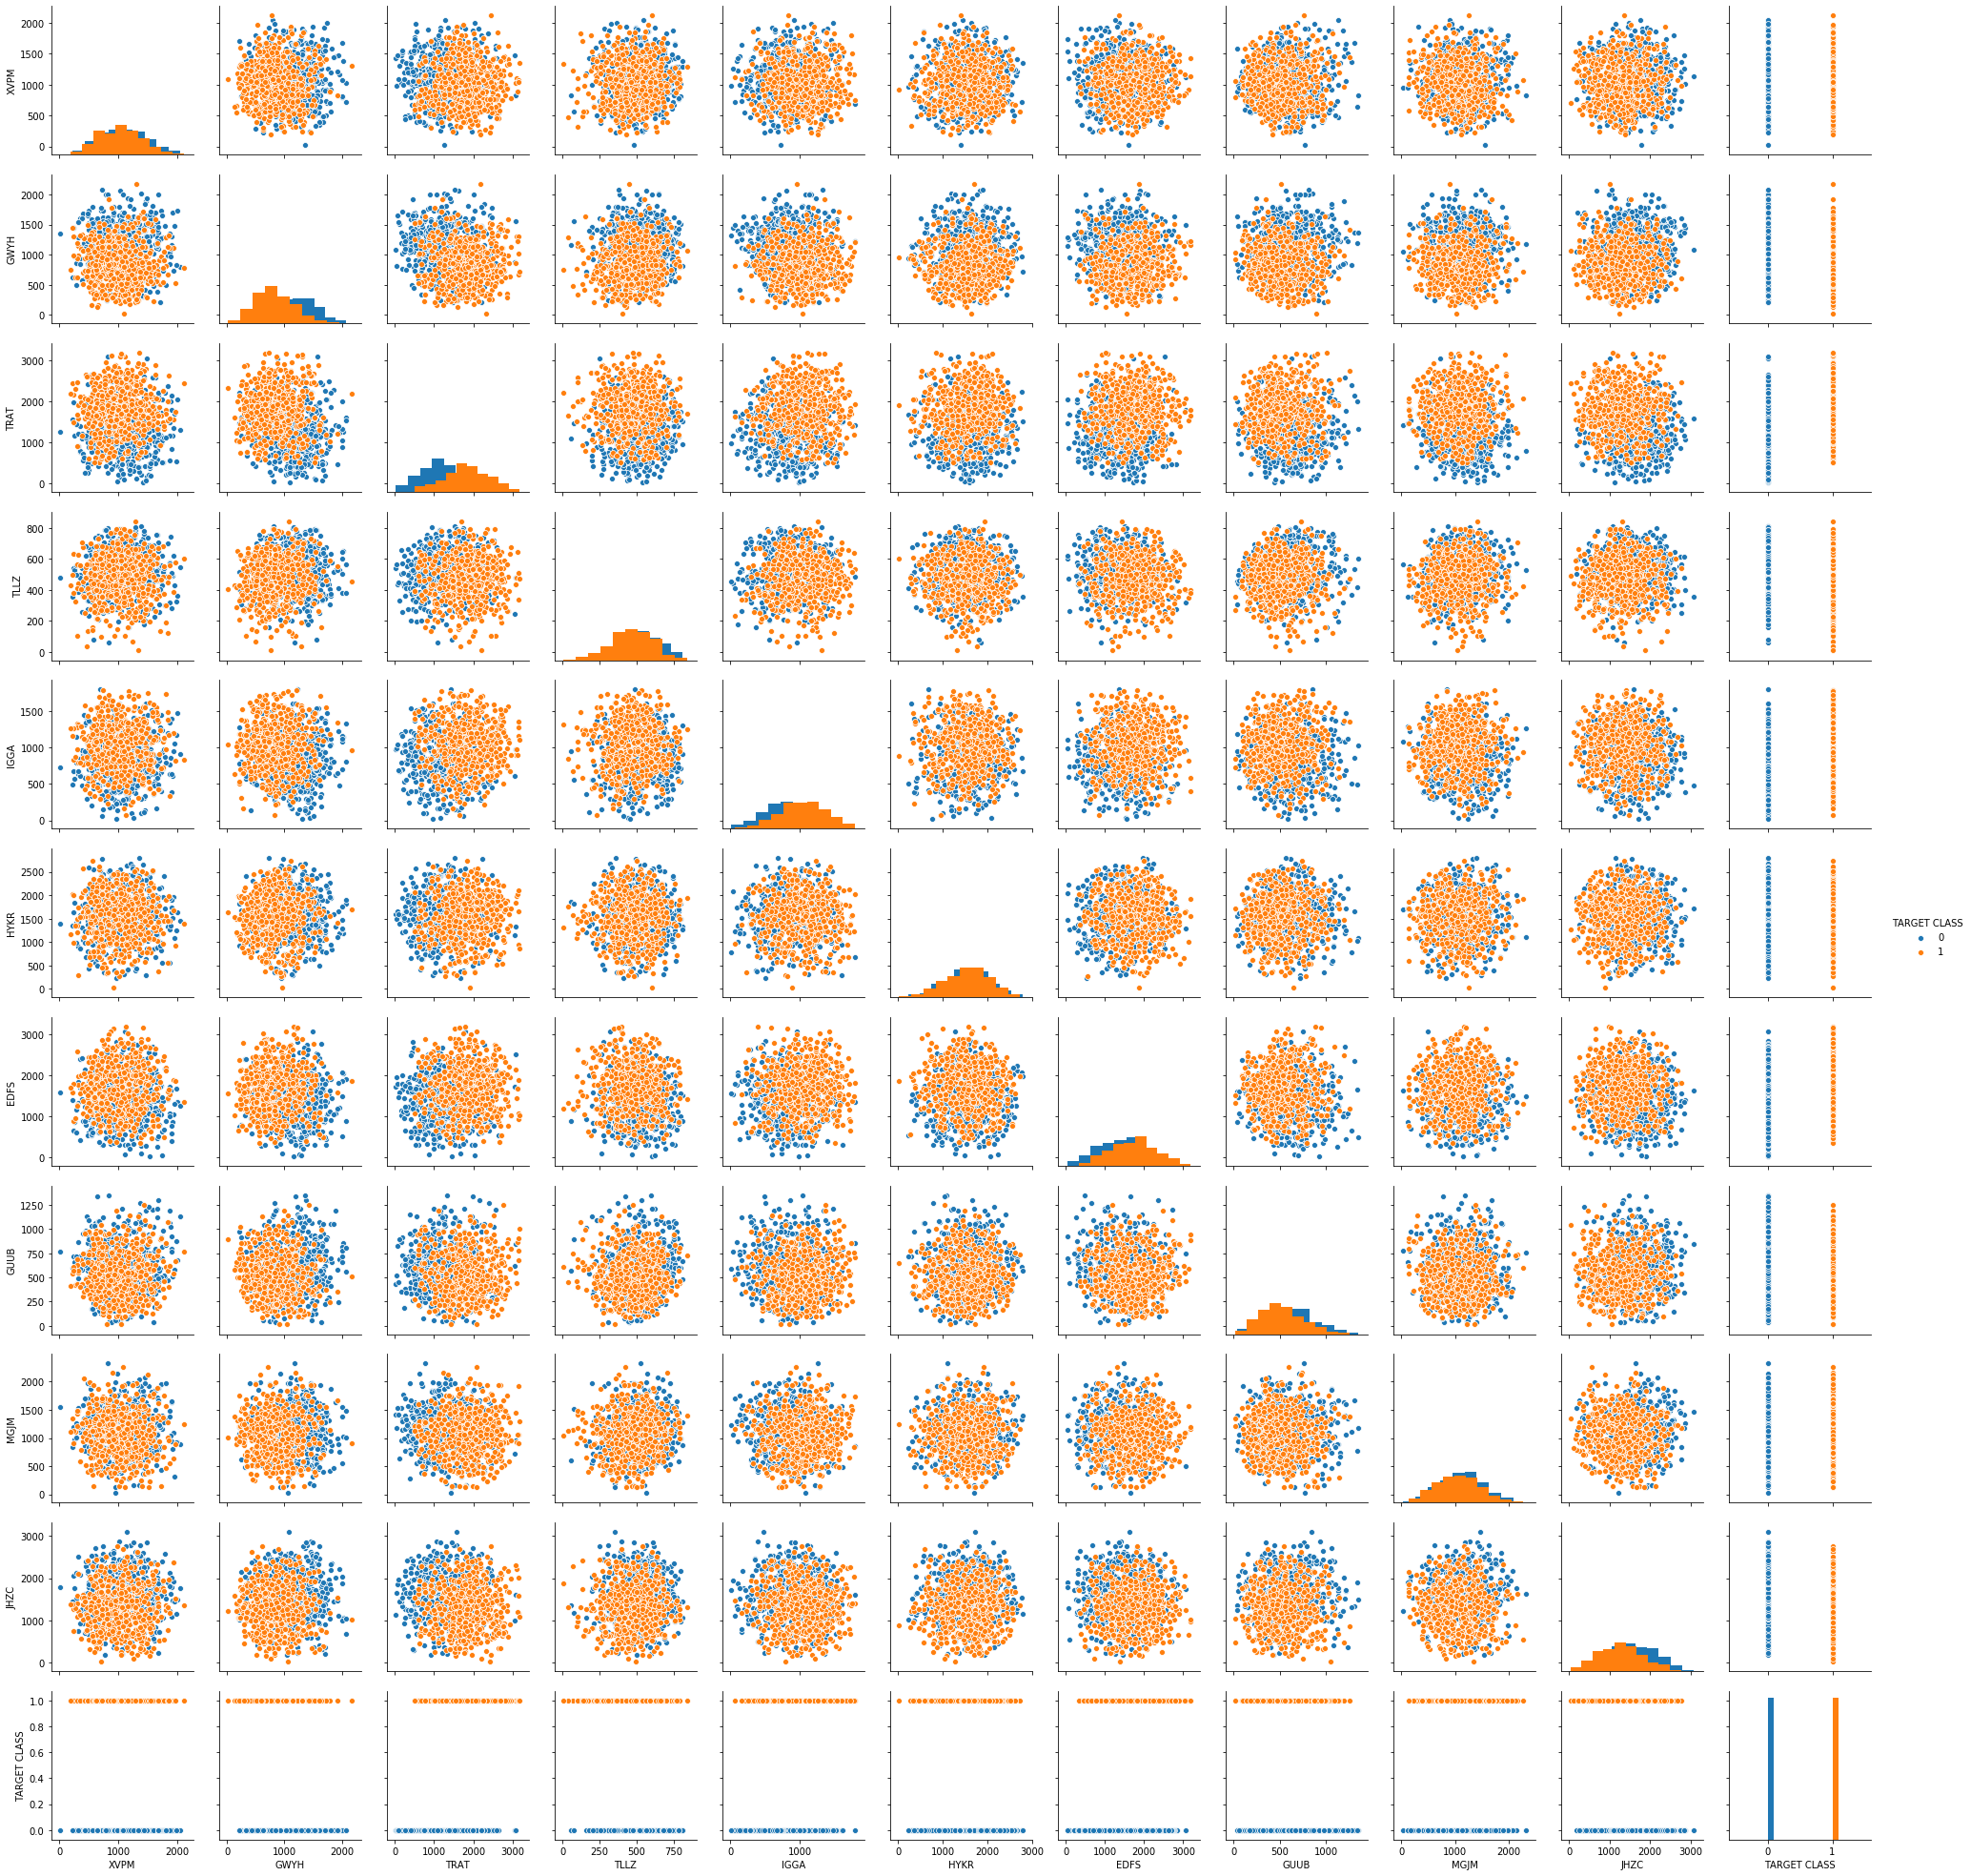

In [7]:
sns.pairplot(knn_df,hue='TARGET CLASS',diag_kind = 'hist')

In [8]:
knn_df.groupby(by='TARGET CLASS').count()

XVPM  GWYH  TRAT  TLLZ  IGGA  HYKR  EDFS  GUUB  MGJM  JHZC
TARGET CLASS                                                            
0              500   500   500   500   500   500   500   500   500   500
1              500   500   500   500   500   500   500   500   500   500

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
knn_std_df = StandardScaler()

In [11]:
knn_std_df.fit(knn_df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
knn_std_df = pd.DataFrame(knn_std_df.transform(knn_df.drop('TARGET CLASS',axis=1)),columns=knn_df.columns[:-1])

In [19]:
knn_std_df

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0    1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1   -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2    0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3    0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4   -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.776682  0.758234 -1.753322  0.507699  0.174588 -1.279354 -1.797957   
996 -0.313446  0.385206  0.885502 -0.083136 -1.208486  0.309242  0.746346   
997 -0.358895 -0.979015  0.837715  0.014018 -1.397424  0.054473  0.164120   
998  0.275080 -0.992399  0.030371  1.062954  1.142871 -0.192872  2.051386   
999  0.625896  0.795109  1.121800  1.185944  0.555582 -1.133032  0.746559   

         GUUB      MGJM      JHZC  
0   -0.932794  1.008313 -1.069627  
1   -0.461864  0.258321 -1.041546  
2    1.149298  2.184784  0.342811  
3   -0.888557  0.162310 -0.002793  
4    0.391419 -1.365603  0.787762  
..        ...       ...       ...  
995  0.431419  0.088717  1.188886  
996 -0.112571 -1.763636 -1.559081  
997 -1.514726 -0.275122  0.864287  
998 -0.036233  0.436685 -0.212456  
999 -1.251565 -0.603529 -0.879859  

[1000 rows x 10 columns]

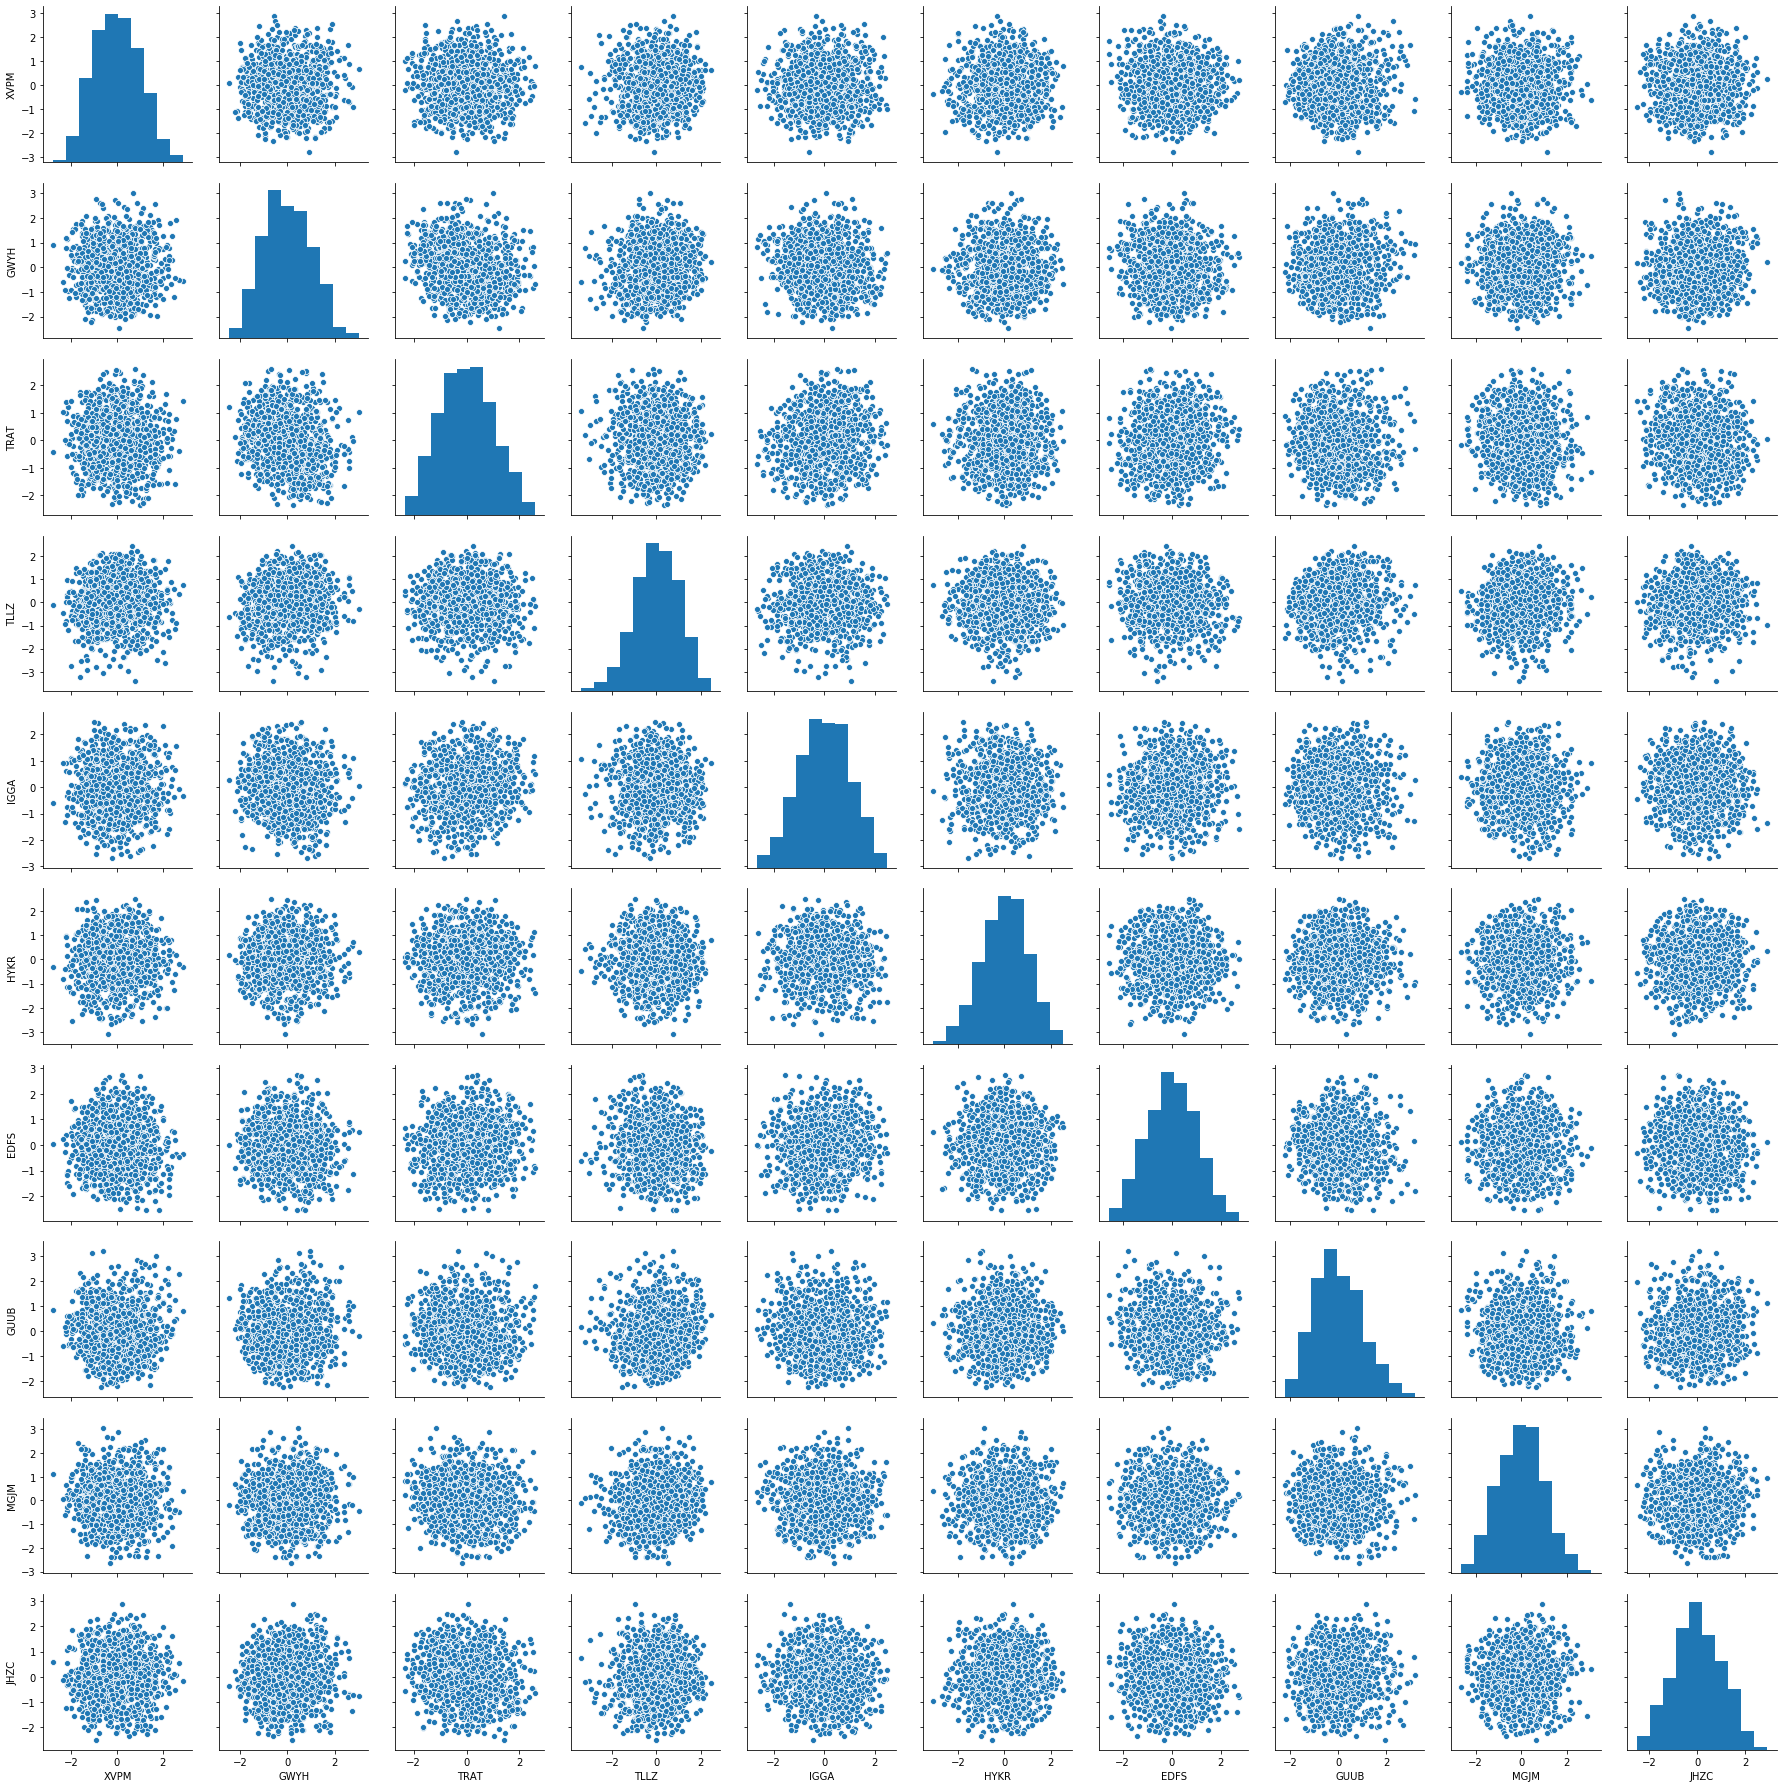

In [20]:
sns.pairplot(knn_std_df)

In [21]:
knn_std_df.describe()

XVPM          GWYH          TRAT          TLLZ          IGGA  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   1.187939e-17  1.662004e-16  7.993606e-18  1.694200e-16 -1.438849e-16   
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00   
min   -2.788339e+00 -2.474303e+00 -2.340083e+00 -3.409927e+00 -2.668575e+00   
25%   -7.757873e-01 -7.574735e-01 -7.293713e-01 -6.538711e-01 -6.936419e-01   
50%   -2.472083e-02 -3.442255e-02 -1.072910e-02  3.566665e-02 -3.590482e-03   
75%    7.308466e-01  7.235137e-01  7.215308e-01  7.386505e-01  6.998930e-01   
max    2.863927e+00  3.009948e+00  2.579241e+00  2.451642e+00  2.465393e+00   

               HYKR          EDFS          GUUB          MGJM          JHZC  
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  
mean  -2.786660e-16 -1.606493e-16 -7.838175e-17 -5.010437e-16  2.364775e-17  
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  
min   -3.087121e+00 -2.555607e+00 -2.215822e+00 -2.648319e+00 -2.503543e+00  
25%   -6.718168e-01 -7.168625e-01 -7.266069e-01 -7.136450e-01 -6.921254e-01  
50%    2.911148e-02  8.155695e-03 -8.463946e-02  2.489807e-02 -1.931429e-02  
75%    6.919471e-01  7.032086e-01  6.650219e-01  6.978394e-01  7.253420e-01  
max    2.518753e+00  2.732696e+00  3.198000e+00  3.060964e+00  2.881896e+00

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(knn_std_df, knn_df['TARGET CLASS'], test_size=0.4, random_state=101)

In [24]:
X_train

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
146 -0.640727 -0.182566 -0.908251  0.414341  1.834486 -0.638712 -0.478892   
15  -0.490680 -1.374540  1.520406 -0.154866  0.475060 -1.191463  1.473040   
627 -1.039447 -1.062953  1.308608  0.798595 -0.084799  0.510605  0.327145   
799 -0.382012  0.273180 -0.513994 -0.086431 -1.570892 -0.578730  1.883652   
497  0.373422 -0.425548 -0.714752  1.699293 -0.680716 -0.992901  0.224659   
..        ...       ...       ...       ...       ...       ...       ...   
575  1.286740  0.062053 -0.705295 -2.079875 -1.449433 -0.799082  1.873326   
838  1.056628  2.176742  1.173371  0.141676 -0.375129  0.106478 -0.842854   
337  0.935842  0.552590 -1.372636  0.378254  0.916928  0.365400 -1.347375   
523 -1.073616  0.300187 -1.536335  0.585133 -0.529769 -1.570165 -0.692331   
863  0.589397 -0.988244  0.142134 -0.362477  1.799580 -1.946273  1.264719   

         GUUB      MGJM      JHZC  
146 -1.330923  0.560747 -0.449671  
15  -0.544365 -0.175929 -0.063004  
627  0.866653 -1.238854 -0.725114  
799 -0.058987  0.810089 -1.673980  
497 -0.312963 -0.963304  0.665033  
..        ...       ...       ...  
575  0.686651  0.346299 -1.130251  
838  1.996686 -1.531655  0.001460  
337 -0.853849  0.899254  1.316637  
523 -0.914993  0.394708 -0.117782  
863  0.770453 -0.458790 -0.889258  

[600 rows x 10 columns]

In [25]:
y_train

146    1
15     1
627    1
799    0
497    0
      ..
575    1
838    0
337    0
523    0
863    1
Name: TARGET CLASS, Length: 600, dtype: int64

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)

In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [31]:
pred = knn.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       199
           1       0.71      0.72      0.71       201

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400

[[141  58]
 [ 57 144]]


In [33]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


In [34]:
error_rate

[0.2875,
 0.2975,
 0.225,
 0.235,
 0.2,
 0.21,
 0.175,
 0.175,
 0.1825,
 0.18,
 0.19,
 0.185,
 0.1775,
 0.175,
 0.1825,
 0.18,
 0.1725,
 0.1825,
 0.1825,
 0.1925,
 0.18,
 0.1825,
 0.185,
 0.1725,
 0.17,
 0.175,
 0.1725,
 0.1675,
 0.1725,
 0.17,
 0.1725,
 0.175,
 0.175,
 0.1725,
 0.17,
 0.17,
 0.17,
 0.17,
 0.175]

In [43]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='green', marker='o', linestyle='dashed',markersize=6,markerfacecolor='red')

In [47]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
pred_i = knn.predict(X_test)
print(classification_report(y_test,pred_i))
print(confusion_matrix(y_test,pred_i))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       199
           1       0.82      0.84      0.83       201

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

[[163  36]
 [ 32 169]]
